In [2]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import linkage, dendrogram
import scipy.spatial.distance as ssd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# compute distances
rois = np.array([
    [0.1, 0.2, 0.3, 0.5, 0.4],
    [0.7, 0.2, 0.4, 0.2, 0.0],
    [0.1, 0.2, 0.3, 0.4, 0.4],
    [0.6, 0.1, 0.2, 0.5, 0.9],
])

pairwise_dist = pairwise_distances(rois)

distances_df = pd.DataFrame(pairwise_dist)

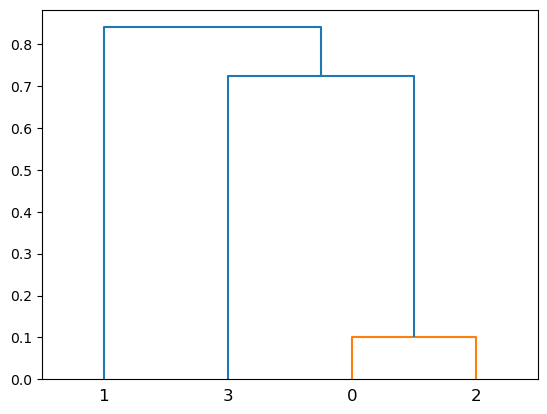

In [9]:
### Using scipy
# convert the redundant n*n square matrix form into a condensed nC2 array
# distArray[{n choose 2}-{n-i choose 2} + (j-i-1)] is the distance between points i and j
distArray = ssd.squareform(pairwise_dist)

# complete_clustering = linkage(rois, method="complete", metric="euclidean")
average_clustering = linkage(distArray, method="average")
# single_clustering = linkage(rois, method="single", metric="euclidean")

dendrogram(average_clustering)
plt.show()

In [18]:
### Using sklearn
# 2. Hierarchical Clustering
n_clusters = 2  # Adjust the number of clusters as needed
clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average', metric='precomputed')
cluster_labels = clustering.fit_predict(distances_df)

# 3. Extract Clusters
clusters = {}
for cluster_id in range(n_clusters):
    clusters[cluster_id] = [i for i, label in enumerate(cluster_labels) if label == cluster_id]


In [24]:
clusters

{0: [0, 2], 1: [1], 2: [3]}

In [18]:
distances_df

,0,1,2,3
0,0.000000,0.787401,0.100000,0.721110
1,0.787401,0.000000,0.754983,0.979796
2,0.100000,0.754983,0.000000,0.728011
3,0.721110,0.979796,0.728011,0.000000


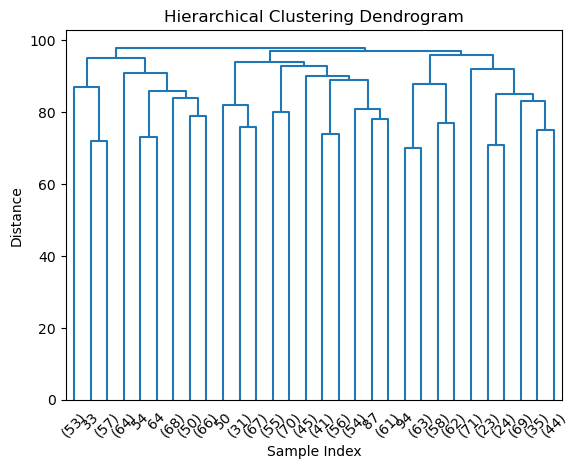

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate sample data
X, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=42)

# Perform agglomerative clustering
# You can specify parameters such as number of clusters, linkage method, etc.
# Here, we use 'ward' linkage which minimizes the variance of clusters being merged.
agg_clustering = AgglomerativeClustering(n_clusters=None, linkage='ward', distance_threshold=0).fit(X)


# Plot the resulting dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and plot dendrogram
    # `model.children_` attribute stores the hierarchical clustering encoded as a linkage matrix
    # `dendrogram` function from scipy plots the dendrogram based on the linkage matrix
    # We use the `truncate_mode='lastp'` to show only the last p merged clusters
    # `p` is set to 30 in this example, you can adjust it based on your data size
    children = model.children_
    distance = np.arange(children.shape[0])
    no_of_observations = np.arange(2, children.shape[0] + 2)
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)

    # Plot the dendrogram
    dendrogram(linkage_matrix, **kwargs)


plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_clustering, truncate_mode='lastp', p=30)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


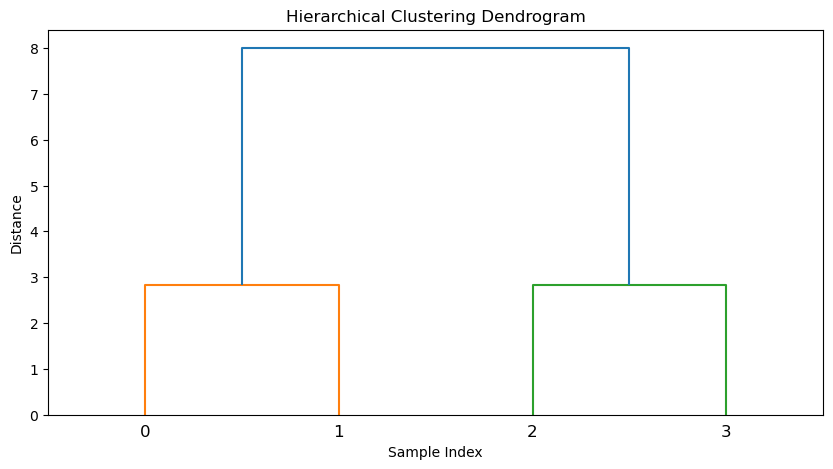

In [2]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Example data (replace this with your own data)
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Perform hierarchical clustering
Z = linkage(data, method='ward')  # You can choose different linkage methods such as 'single', 'complete', 'average', etc.

# Plot dendrogram
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


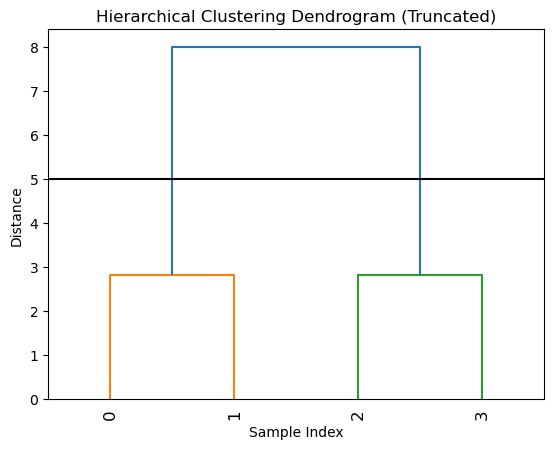

In [9]:
# Cut dendrogram to obtain clusters
max_d = 5  # Max distance to cluster
clusters = dendrogram(Z, truncate_mode='lastp', p=12, show_leaf_counts=True, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.axhline(y=max_d, c='k')
plt.show()

In [11]:
from scipy.cluster.hierarchy import fcluster

# Extract clusters
roi_cluster_associations = fcluster(Z, max_d, criterion='distance')
print("Clusters:", roi_cluster_associations)

Clusters: [1 1 2 2]


In [13]:
from collections import defaultdict
from scipy.cluster.hierarchy import fcluster, linkage

# Example data
data = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])

# Perform hierarchical clustering with complete linkage
Z = linkage(data, method='complete')

# Specify the maximum distance threshold for forming clusters
max_d = 5

# Extract clusters based on distance threshold
clusters = fcluster(Z, max_d, criterion='distance')

# Initialize a dictionary to store clusters and their samples
cluster_samples = defaultdict(list)

# Iterate over cluster labels and collect samples
for i, cluster_label in enumerate(clusters):
    cluster_samples[cluster_label].append(i)  # Assuming i is the index of the sample
    
# Convert the dictionary to a list of clusters and samples
clusters_list = [(cluster_label, samples) for cluster_label, samples in cluster_samples.items()]

# Print clusters and their samples
for cluster_label, samples in clusters_list:
    print(f"Cluster {cluster_label}: Samples {samples}")


Cluster 1: Samples [0, 1]
Cluster 2: Samples [2, 3]


In [21]:
dd = defaultdict(list)
dd[1].append('(0;0)')
dd[1].append('(2;0)')
dd[2].append('(0;1)')


In [22]:
dd

defaultdict(list, {1: ['(0;0)', '(2;0)'], 2: ['(0;1)']})